# Plant Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS=5

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
        # save_to_dir="AugmentedTrainImages"
)

Found 14440 images belonging to 15 classes.


In [4]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [5]:
class_names = list(train_generator.class_indices.keys())
N_CLASSES = len(class_names)
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.7002371  0.6492567  0.6767077 ]
  [0.7041551  0.6531747  0.6806257 ]
  [0.71902657 0.6680462  0.69549716]
  ...
  [0.628038   0.56921446 0.5888223 ]
  [0.6270333  0.56820977 0.5878176 ]
  [0.6260286  0.5672051  0.5868129 ]]

 [[0.7000696  0.6490892  0.6765402 ]
  [0.70398766 0.65300727 0.68045825]
  [0.71802187 0.6670415  0.69449246]
  ...
  [0.61382693 0.5550034  0.57461125]
  [0.61365944 0.5548359  0.57444376]
  [0.613492   0.5546685  0.5742763 ]]

 [[0.6999022  0.6489218  0.67637277]
  [0.70382017 0.6528398  0.68029076]
  [0.7170172  0.6660368  0.69348776]
  ...
  [0.66372716 0.60490364 0.6245115 ]
  [0.6684157  0.6095922  0.62920004]
  [0.6731043  0.61428076 0.6338886 ]]

 ...

 [[0.746586   0.6877625  0.70737034]
  [0.7440742  0.6852507  0.70485854]
  [0.74156255 0.682739   0.70234686]
  ...
  [0.6536761  0.59485257 0.6066173 ]
  [0.66048014 0.6016566  0.6134213 ]
  [0.6446089  0.5857854  0.5975501 ]]

 [[0.7119982  0.6531747  0.67278254]
  [0.7118308  0.65300727 0.6726151 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
        # save_to_dir="AugmentedValidationImages"
)

Found 2058 images belonging to 15 classes.


In [8]:
for image_batch, label_batch in validation_generator:
    print(image_batch[0])
    break

[[[0.521663   0.52950615 0.5255846 ]
  [0.52364683 0.53148997 0.5275684 ]
  [0.5257243  0.5335674  0.52964586]
  ...
  [0.49847057 0.5141568  0.51023525]
  [0.49925882 0.5149451  0.5110235 ]
  [0.50862265 0.5243089  0.52038735]]

 [[0.5222625  0.53010565 0.5261841 ]
  [0.5176336  0.52547675 0.5215552 ]
  [0.5140344  0.5218775  0.51795596]
  ...
  [0.50045437 0.51614064 0.5122191 ]
  [0.49859753 0.51428384 0.51036227]
  [0.5112677  0.526954   0.5230324 ]]

 [[0.54466677 0.5525099  0.54858834]
  [0.54268295 0.5505261  0.5466045 ]
  [0.5400626  0.54790574 0.5439842 ]
  ...
  [0.50180167 0.517488   0.51356643]
  [0.49845114 0.5141374  0.5102158 ]
  [0.51386595 0.5295522  0.52563065]]

 ...

 [[0.5412233  0.5412233  0.53338015]
  [0.5602695  0.5602695  0.55242634]
  [0.5645468  0.5645468  0.5567037 ]
  ...
  [0.53269684 0.54054    0.5287753 ]
  [0.5323291  0.5401722  0.5284075 ]
  [0.5310066  0.5388497  0.527085  ]]

 [[0.54424876 0.54424876 0.5364056 ]
  [0.56134266 0.56134266 0.5534995 ]


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
        # save_to_dir="AugmentedTestImages"
)

Found 4140 images belonging to 15 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.67245895 0.63324326 0.6293217 ]
  [0.679236   0.6400203  0.63609874]
  [0.68601304 0.64679736 0.6428758 ]
  ...
  [0.6944227  0.65520704 0.6591286 ]
  [0.69803923 0.65882355 0.6627451 ]
  [0.69747806 0.6582624  0.66218394]]

 [[0.69631684 0.6571011  0.6531795 ]
  [0.69157284 0.65235716 0.6484356 ]
  [0.6868289  0.6476132  0.64369166]
  ...
  [0.6951005  0.6558848  0.6598064 ]
  [0.69803923 0.65882355 0.6627451 ]
  [0.69544494 0.65622926 0.6601508 ]]

 [[0.6944227  0.65520704 0.65128547]
  [0.6951005  0.6558848  0.65196323]
  [0.6957782  0.6565625  0.65264094]
  ...
  [0.6957782  0.6565625  0.6604841 ]
  [0.69803923 0.65882355 0.6627451 ]
  [0.6934118  0.65419614 0.6581177 ]]

 ...

 [[0.50980395 0.44705886 0.44705886]
  [0.48660308 0.423858   0.423858  ]
  [0.44571635 0.38297126 0.38297126]
  ...
  [0.46924576 0.41042224 0.39865753]
  [0.46179098 0.40296745 0.39120272]
  [0.4543362  0.39551264 0.38374794]]

 [[0.50980395 0.44705886 0.44705886]
  [0.47982603 0.4170809  0.4170809 ]


## Create Checkpoints

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_filepath = "../checkpoints/plant-disease-model-with-image-data-generator/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

## Building the Model

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_CLASSES, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1,
    epochs=EPOCHS,
    callbacks=[checkpoint]
)

Epoch 1/5
452/452 [==============================] - ETA: 0s - loss: 1.8572 - accuracy: 0.3867
Epoch 1: val_accuracy improved from -inf to 0.59135, saving model to ../checkpoints/plant-disease-model-with-image-data-generator\model-01-0.5914.hdf5
452/452 [==============================] - 286s 631ms/step - loss: 1.8572 - accuracy: 0.3867 - val_loss: 1.2148 - val_accuracy: 0.5914
Epoch 2/5
452/452 [==============================] - ETA: 0s - loss: 0.9968 - accuracy: 0.6652
Epoch 2: val_accuracy improved from 0.59135 to 0.73712, saving model to ../checkpoints/plant-disease-model-with-image-data-generator\model-02-0.7371.hdf5
452/452 [==============================] - 281s 620ms/step - loss: 0.9968 - accuracy: 0.6652 - val_loss: 0.7867 - val_accuracy: 0.7371
Epoch 3/5
452/452 [==============================] - ETA: 0s - loss: 0.6533 - accuracy: 0.7723
Epoch 3: val_accuracy improved from 0.73712 to 0.79883, saving model to ../checkpoints/plant-disease-model-with-image-data-generator\model-0

In [16]:
scores = model.evaluate(test_generator)

130/130 [==============================] - 33s 251ms/step - loss: 0.3667 - accuracy: 0.8771


In [17]:
scores

[0.3667226731777191, 0.8770531415939331]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [18]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [19]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 452}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

5

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.8571548461914062,
 0.9968242645263672,
 0.6533311605453491,
 0.5027979016304016,
 0.41240599751472473]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.5913508534431458,
 0.737123429775238,
 0.7988338470458984,
 0.8576287627220154,
 0.8663751482963562]

In [26]:
acc

[0.38670361042022705,
 0.6652354598045349,
 0.7722991704940796,
 0.823199450969696,
 0.8533241152763367]

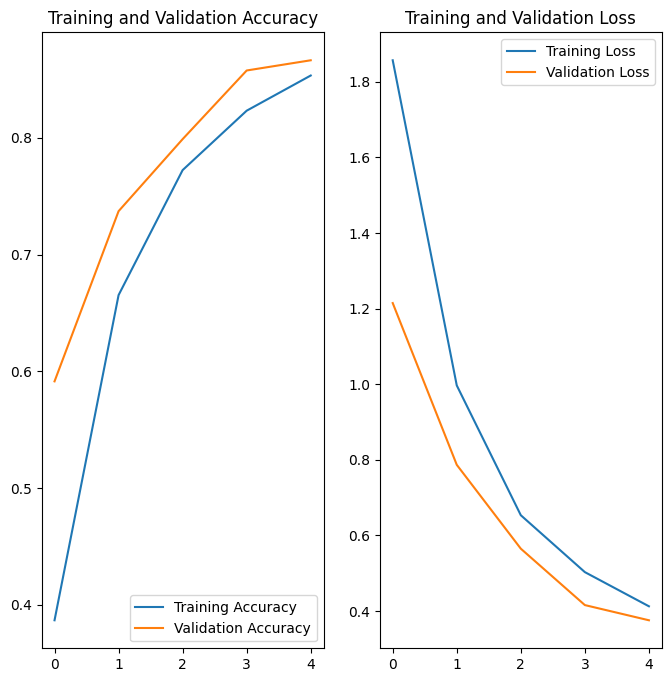

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 243ms/step
predicted label: Tomato_Leaf_Mold


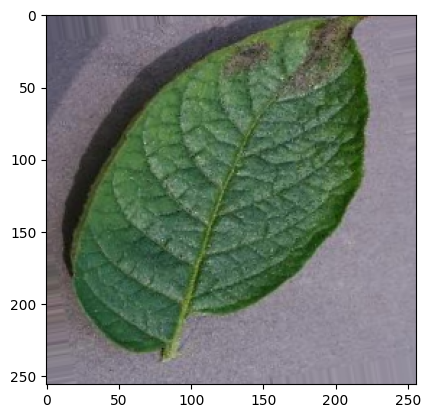

In [28]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 26ms/step


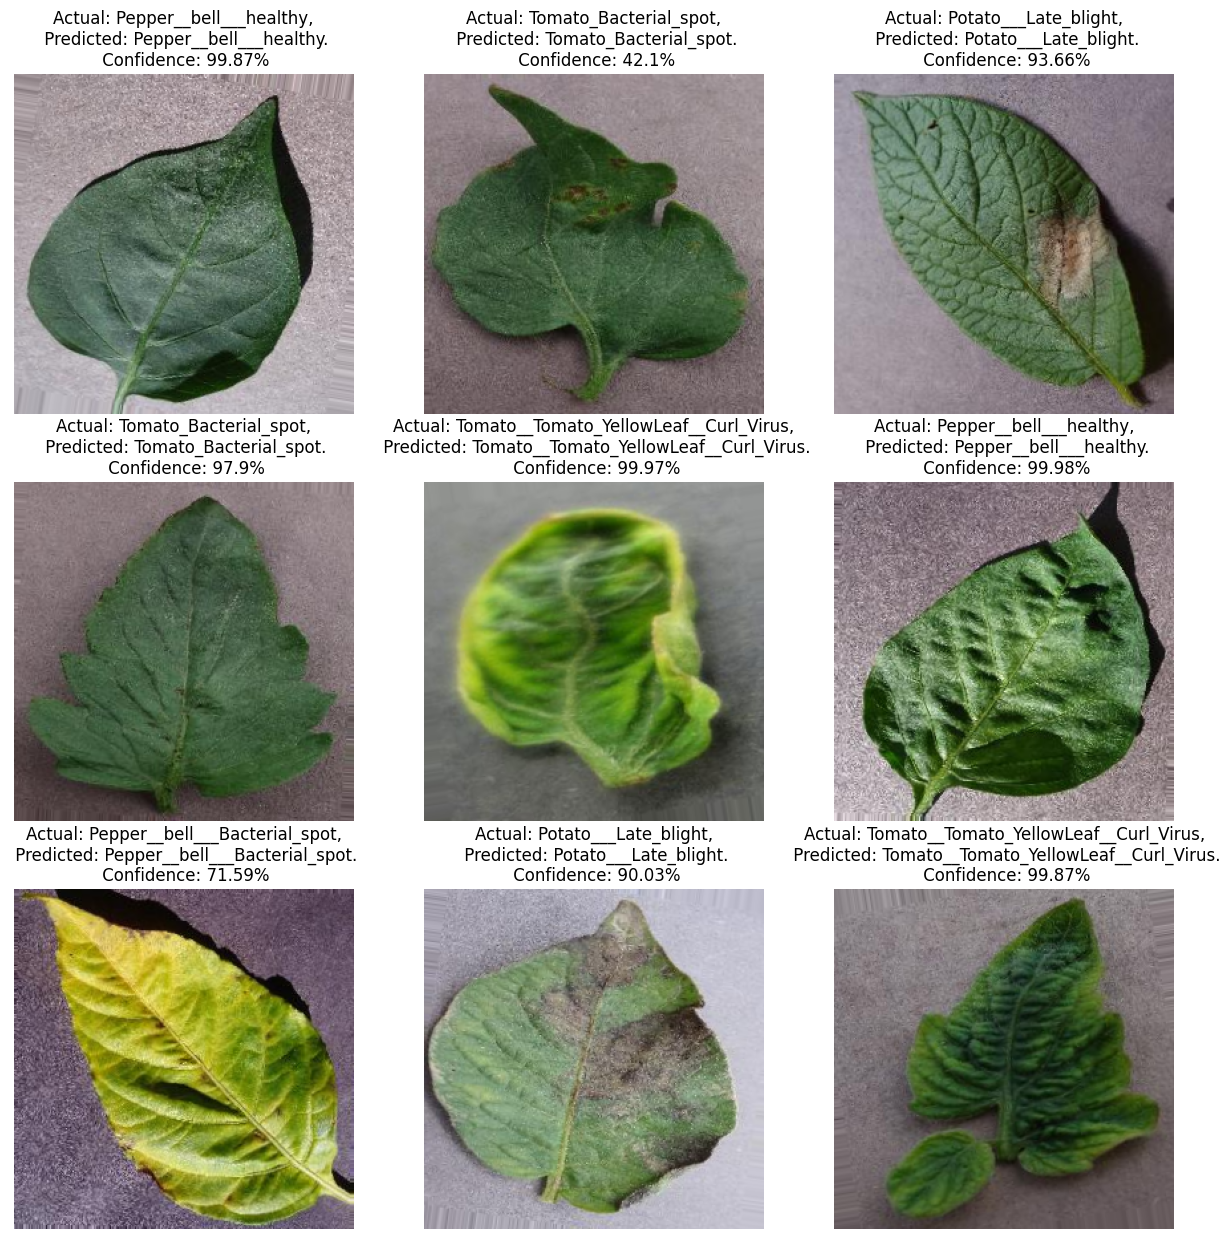

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model
We append the model to the list of models as a new version

In [31]:
import os
model_dir = "../saved-models/plant-disease-model-with-image-data-generator"
model_version = max([int(i) for i in os.listdir("../saved-models/plant-disease-model-with-image-data-generator") + [0]])+1
model_export_path = f"{model_dir}/{model_version}"

tf.saved_model.save(
    model,
    export_dir=model_export_path,
)

print(f"SavedModel files: {os.listdir(model_export_path)}")

INFO:tensorflow:Assets written to: ../saved-models/plant-disease-model-with-image-data-generator/1\assets


INFO:tensorflow:Assets written to: ../saved-models/plant-disease-model-with-image-data-generator/1\assets


SavedModel files: ['assets', 'fingerprint.pb', 'saved_model.pb', 'variables']


In [32]:
model.save("../models/plants-disease-with-image-data-generator.h5")